1. The dataset for Amazon Review Electronics Product is available at Amazon
Reviews Dataset . Download the 5-core dataset for Electronics Category, under
the heading of Small subset for experimentation. Read the file to a dataframe.
Remember to keep the product metadata in a distinct dataframe as well.

In [56]:
import pandas as pd
import gzip
import json

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield json.loads(l)

def getDF(path):
    df = {}
    for i, d in enumerate(parse(path)):
        df[i] = d
        if (i + 1) % 1000000 == 0:  # Print progress every 1,000,000 records
            print(f"Processed {i+1} records...")
    print(f"Finished processing {i+1} records.")
    return pd.DataFrame.from_dict(df, orient='index')

df_reviews = getDF('D:\IR ASS 3\Electronics_5.json.gz')


Processed 1000000 records...
Processed 2000000 records...
Processed 3000000 records...
Processed 4000000 records...
Processed 5000000 records...
Processed 6000000 records...
Finished processing 6739590 records.


In [57]:
# Print the first few rows of the dataframe
if df_reviews is not None:
    print(df_reviews.head())
else:
    print("DataFrame creation failed.")

   overall vote  verified   reviewTime      reviewerID        asin  \
0      5.0   67      True  09 18, 1999   AAP7PPBU72QFM  0151004714   
1      3.0    5      True  10 23, 2013  A2E168DTVGE6SV  0151004714   
2      5.0    4     False   09 2, 2008  A1ER5AYS3FQ9O3  0151004714   
3      5.0   13     False   09 4, 2000  A1T17LMQABMBN5  0151004714   
4      3.0    8      True   02 4, 2000  A3QHJ0FXK33OBE  0151004714   

                            style      reviewerName  \
0       {'Format:': ' Hardcover'}      D. C. Carrad   
1  {'Format:': ' Kindle Edition'}               Evy   
2       {'Format:': ' Paperback'}             Kcorn   
3       {'Format:': ' Hardcover'}   Caf Girl Writes   
4       {'Format:': ' Hardcover'}  W. Shane Schmidt   

                                          reviewText  \
0  This is the best novel I have read in 2 or 3 y...   
1  Pages and pages of introspection, in the style...   
2  This is the kind of novel to read when you hav...   
3  What gorgeous languag

In [58]:
print(df_reviews.shape)

(6739590, 12)


In [59]:
import pandas as pd
import gzip
import json

def parse(path):
    with gzip.open(path, 'rb') as g:
        for l in g:
            try:
                yield json.loads(l)
            except json.JSONDecodeError:
                continue

def getDF(path):
    df = {}
    for i, d in enumerate(parse(path)):
        df[i] = d
        if (i + 1) % 1000000 == 0:  # Printing progress every 1,000,000 records
            print(f"Processed {i+1} records...")
    print(f"Finished processing {i+1} records.")
    return pd.DataFrame.from_dict(df, orient='index')

meta_df = getDF(r'D:\IR ASS 3\meta_Electronics.json.gz')  # Using raw string

# Printing the first few rows of the dataframe
print(meta_df.head())

Finished processing 786445 records.
                                            category tech1  \
0  [Electronics, Camera &amp; Photo, Video Survei...         
1                  [Electronics, Camera &amp; Photo]         
2  [Electronics, eBook Readers &amp; Accessories,...         
3  [Electronics, eBook Readers & Accessories, eBo...         
4  [Electronics, eBook Readers & Accessories, eBo...         

                                         description fit  \
0  [The following camera brands and models have b...       
1  [This second edition of the Handbook of Astron...       
2  [A zesty tale. (Publishers Weekly)<br /><br />...       
3                                                 []       
4  [&#8220;sex.lies.murder.fame. is brillllli&#82...       

                                               title  \
0  Genuine Geovision 1 Channel 3rd Party NVR IP S...   
1  Books "Handbook of Astronomical Image Processi...   
2                                     One Hot Summer   
3  Hur

In [60]:
print(meta_df.shape)

(786445, 19)


In [61]:
merged_df = pd.merge(df_reviews, meta_df, on='asin', how='inner')

In [62]:
print(merged_df.shape)

(7056550, 30)


2. Choose a product of your choice. Let's say ‘Headphones’.
   

In [63]:
# Filter metadata for the chosen product ('Headphones')
Headphone_merged_df = merged_df[merged_df['title'].str.contains('Headphones', case=False)]

# Printing the first few rows of the filtered metadata dataframe
print(Headphone_merged_df.head())

      overall vote  verified   reviewTime      reviewerID        asin  \
4824      5.0    2      True  02 28, 2013  A15U5NUS1EY7IQ  B000001OMI   
4825      5.0    5      True  10 17, 2012   AHGGNAIT6BH5X  B000001OMI   
4826      4.0  NaN     False  09 27, 2012  A33HUURDJ4DVG3  B000001OMI   
4827      5.0    4      True  11 27, 2008   A680RUE1FDO8B  B000001OMI   
4828      3.0    2     False  12 24, 2007  A3OLAZKM77XR6P  B000001OMI   

                                   style      reviewerName  \
4824  {'Format:': ' Personal Computers'}      S. Bommarito   
4825                                 NaN          Edward H   
4826  {'Format:': ' Personal Computers'}                HB   
4827  {'Format:': ' Personal Computers'}  Jerry Saperstein   
4828  {'Format:': ' Personal Computers'}        Tennis Ace   

                                             reviewText  \
4824  I'm getting listening stations going in severa...   
4825  Needed Headset for watching and editing videos...   
4826  I was

3. Report the total number of rows for the product. Perform appropriate
pre-processing as handling missing values, duplicates and other.

In [64]:
# Report the total number of rows for 'Headphones'
total_rows_headphones = len(Headphone_merged_df)
print("Total number of rows for 'Headphones':", total_rows_headphones)

# Handle missing values
Headphone_merged_df = Headphone_merged_df.dropna(subset=['asin',  'overall','reviewerID', 'reviewText', 'imageURL', 'title', 'brand', 'feature', 'tech1', 'fit', 'imageURL'])

# Calculate the total number of rows after handling missing values
total_rows_after_preprocessing = len(Headphone_merged_df)
print("Total number of rows after handling missing values:", total_rows_after_preprocessing)

# Drop duplicate rows
Headphone_merged_df = Headphone_merged_df.drop_duplicates(subset=['reviewerID', 'asin'], keep='first')


# Calculate the total number of rows after handling missing values
total_rows_after_preprocessing = len(Headphone_merged_df)
print("Total number of rows after handling missing values:", total_rows_after_preprocessing)



Total number of rows for 'Headphones': 283151
Total number of rows after handling missing values: 283112
Total number of rows after handling missing values: 259967


In [65]:
Headphone_merged_df.to_pickle('D:\IR ASS 3\Headphone_merged_df_part3.pkl')

4. Obtain the Descriptive Statistics of the product as : - 
a. Number of Reviews. 
b. Average Rating Score. 
c. Number of Unique Products. 
d. Number of Good Rating. 
e. Number of Bad Ratings ( Set a threshold of >=3 as ‘Good’ and rest as 
‘Bad’), and
f. Number of Reviews corresponding to each Rating. 

In [66]:
# a. Number of Reviews
num_reviews = len(Headphone_merged_df)
# b. Average Rating Score
avg_rating = Headphone_merged_df['overall'].mean()

# c. Number of Unique Products
num_unique_products = Headphone_merged_df['asin'].nunique()


# d. Number of Good Ratings
num_good_ratings = Headphone_merged_df[Headphone_merged_df['overall'] >= 3]['overall'].count()

# e. Number of Bad Ratings
num_bad_ratings = Headphone_merged_df[Headphone_merged_df['overall'] < 3]['overall'].count()


# f. Number of Reviews corresponding to each Rating
rating_counts = Headphone_merged_df['overall'].value_counts().sort_index()





# Displaying the descriptive statistics
print("Descriptive Statistics for Headphones:")
print("a. Number of Reviews:", num_reviews)
print("b. Average Rating Score:", avg_rating)
print("c. Number of Unique Products:", num_unique_products)
print("d. Number of Good Ratings:", num_good_ratings)
print("e. Number of Bad Ratings:", num_bad_ratings)
print("f. Number of Reviews corresponding to each Rating:")
print(rating_counts)


Descriptive Statistics for Headphones:
a. Number of Reviews: 259967
b. Average Rating Score: 4.070620501832925
c. Number of Unique Products: 5393
d. Number of Good Ratings: 221641
e. Number of Bad Ratings: 38326
f. Number of Reviews corresponding to each Rating:
overall
1.0     19998
2.0     18328
3.0     27339
4.0     51954
5.0    142348
Name: count, dtype: int64


5. Preprocess the Text
a. Removing the HTML Tags.
b. Removing accented characters.
c. Expanding Acronyms.
d. Removing Special Characters
e. Lemmatization
f. Text Normalizer

In [67]:
import re
import unicodedata
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')


print("Before preprocessing:")
print(Headphone_merged_df['reviewText'].head())

def remove_html_tags(text):
    if pd.isnull(text):
        return ""  # Return empty string for missing values
    else:
        clean = re.compile('<.*?>')
        return re.sub(clean, '', str(text))

# Function to remove accented characters
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

# Dictionary of common acronyms to expand
acronyms_dict = {
    "lol": "laugh out loud",
    "brb": "be right back",
    # Add more acronyms as needed
}

# Function to expand acronyms
def expand_acronyms(text, acronyms_dict):
    for acronym, expanded in acronyms_dict.items():
        text = re.sub(r'\b' + re.escape(acronym) + r'\b', expanded, text)
    return text

# Function to remove special characters
def remove_special_characters(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

# Lemmatization
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = nltk.word_tokenize(text)
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in tokens])
    return lemmatized_text

def normalize_text(text):
    if isinstance(text, str):
        text = remove_html_tags(text)
        text = remove_accented_chars(text)
        text = expand_acronyms(text, acronyms_dict)
        text = remove_special_characters(text)
        text = lemmatize_text(text)
        return text
    else:
        return ""  # Return empty string for missing values

# Apply text normalization to a column of the dataframe
Headphone_merged_df['processed_reviewText'] = Headphone_merged_df['reviewText'].apply(normalize_text)



# Print 'processed_reviewText' column after preprocessing
print("\nAfter preprocessing:")
print(Headphone_merged_df['processed_reviewText'].head())

Headphone_merged_df.to_pickle('D:\IR ASS 3\preprocessed_reviews.pkl')


[nltk_data] Downloading package punkt to /home/tusharc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/tusharc/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Before preprocessing:
4824    I'm getting listening stations going in severa...
4825    Needed Headset for watching and editing videos...
4826    I was out of town for a month and needed a pai...
4827    Obviously these headphones are not for the aud...
4828    I bought these headphones at a Tower Records a...
Name: reviewText, dtype: object

After preprocessing:
4824    Im getting listening station going in several ...
4825    Needed Headset for watching and editing video ...
4826    I wa out of town for a month and needed a pair...
4827    Obviously these headphone are not for the audi...
4828    I bought these headphone at a Tower Records ab...
Name: processed_reviewText, dtype: object


In [68]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [69]:
# Filter out rows with empty brand names
Headphone_merged_df = Headphone_merged_df[Headphone_merged_df['brand'] != '']

# Calculate the top 20 most reviewed brands
top_20_most_reviewed_brands = Headphone_merged_df['brand'].value_counts().head(20)
print("Top 20 most reviewed brands:")
print(top_20_most_reviewed_brands)

Top 20 most reviewed brands:
brand
Sony              21439
Sennheiser        14448
Bose               9559
Audio-Technica     6504
Bluedio            5251
Mpow               4902
Panasonic          4878
Philips            4666
Etre Jeune         4662
Symphonized        4238
MEE audio          4070
TaoTronics         4069
Koss               3843
Plantronics        3598
Toysdone           3503
JVC                3463
JLAB               3160
SoundPEATS         3037
EldHus             2702
Photive            2494
Name: count, dtype: int64


In [70]:
# c. Most positively reviewed headphone (or any other electronic product)
most_positively_reviewed_product = Headphone_merged_df[Headphone_merged_df['overall'] == 5]['asin'].value_counts().idxmax()
print("\nMost positively reviewed product:", most_positively_reviewed_product)




Most positively reviewed product: B004WODP20


In [71]:
# # Convert 'reviewTime' to datetime and extract year
Headphone_merged_df['reviewYear'] = pd.to_datetime(Headphone_merged_df['reviewTime']).dt.year

# Group by reviewYear and count the number of ratings
ratings_count_per_year = Headphone_merged_df.groupby('reviewYear')['overall'].count()


years_of_interest = range(2014, 2019)
ratings_count_5_years = ratings_count_per_year.loc[years_of_interest]

# Display the count of ratings for the product over the 5 consecutive years
print("Count of ratings for the product over 5 consecutive years (2014 to 2018):")
print(ratings_count_5_years)

Count of ratings for the product over 5 consecutive years (2014 to 2018):
reviewYear
2014    36183
2015    59444
2016    65483
2017    35977
2018    14546
Name: overall, dtype: int64


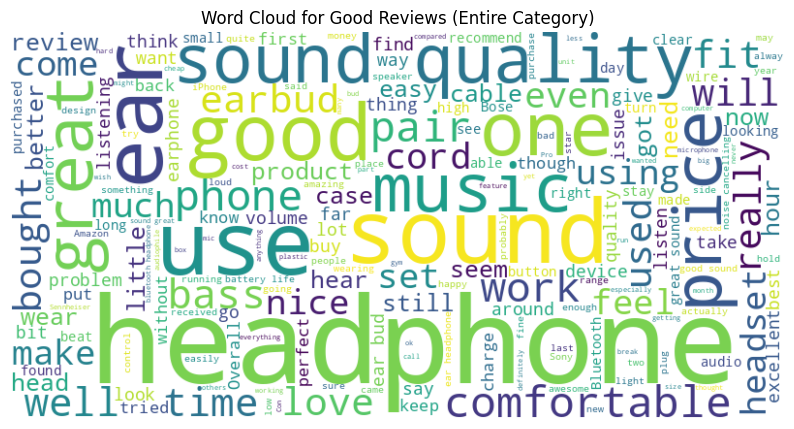

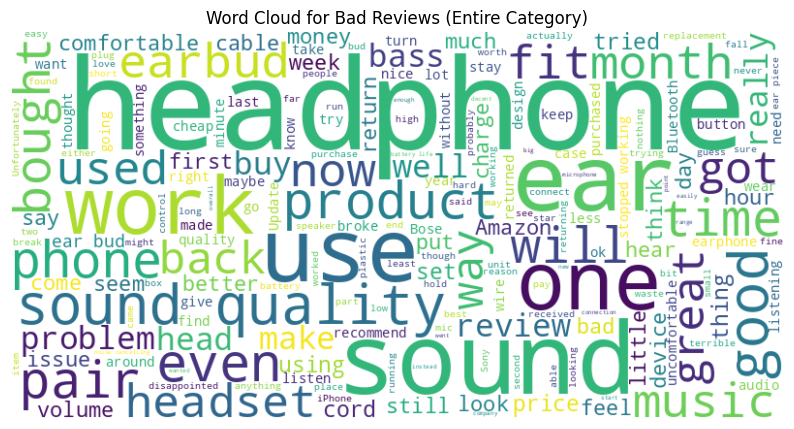

In [72]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Function to generate word cloud from text
def generate_wordcloud(text, title):
    # Remove common words (stopwords) from the text
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)
    
    # Plot word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Check the size of the DataFrame
df_size_good = len(Headphone_merged_df[Headphone_merged_df['overall'] >= 3])
df_size_bad = len(Headphone_merged_df[Headphone_merged_df['overall'] < 3])

# Set the sample size to the minimum of df_size and 100000
sample_size = min(df_size_good, df_size_bad, 100000)

# Sample the good and bad reviews text for the entire category
good_reviews_text_sample = ' '.join(Headphone_merged_df[Headphone_merged_df['overall'] >= 3]['reviewText'].astype(str).sample(sample_size))
bad_reviews_text_sample = ' '.join(Headphone_merged_df[Headphone_merged_df['overall'] < 3]['reviewText'].astype(str).sample(sample_size))

# Generate and plot word clouds
generate_wordcloud(good_reviews_text_sample, "Word Cloud for Good Reviews (Entire Category)")
generate_wordcloud(bad_reviews_text_sample, "Word Cloud for Bad Reviews (Entire Category)")


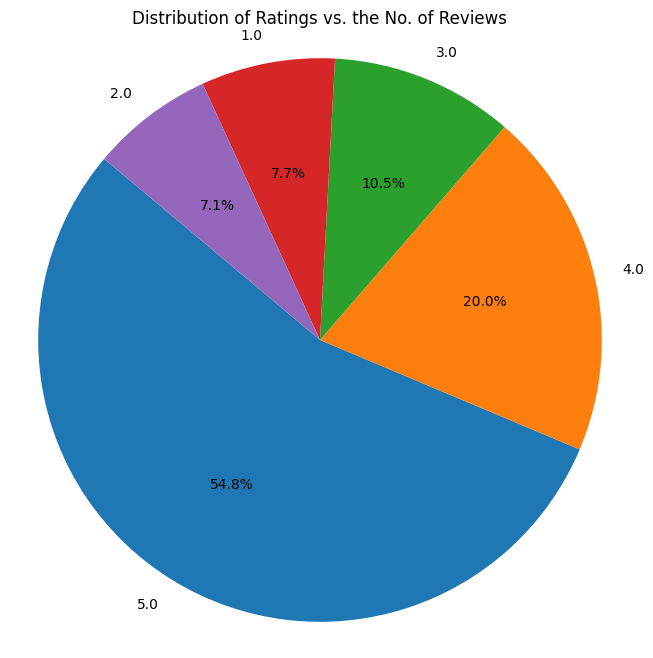

Year with maximum reviews: 2016
Year with the highest number of customers: 2016


In [73]:
# Task f: Plot a pie chart for Distribution of Ratings vs. the No. of Reviews
ratings_distribution = Headphone_merged_df['overall'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(ratings_distribution, labels=ratings_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ratings vs. the No. of Reviews')
plt.axis('equal')
plt.show()

# Task g: Report in which year the product got maximum reviews
max_reviews_year = Headphone_merged_df['reviewYear'].value_counts().idxmax()
print("Year with maximum reviews:", max_reviews_year)

# Task h: Which year has the highest number of customers
highest_customers_year = Headphone_merged_df.groupby('reviewYear')['reviewerID'].nunique().idxmax()
print("Year with the highest number of customers:", highest_customers_year)


7. Use a relevant feature engineering technique to model review text as Bag of
Words model, TF-IDF, Hashing Vectorizer or Word2Vec.

In [74]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()  # You can adjust max_features as needed

# Fit and transform the review text to TF-IDF vectors
tfidf_vectors = tfidf_vectorizer.fit_transform(Headphone_merged_df['reviewText'].astype(str))

# Print the shape of the TF-IDF vectors
print("Shape of TF-IDF vectors:", tfidf_vectors.shape)


Shape of TF-IDF vectors: (259713, 83345)


8. The Rating Class is divided into three categories
● > 3 as Good
● =3 as Average
● <3 as Bad.

In [79]:
# Define a function to categorize ratings
def categorize_rating(rating):
    if rating > 3:
        return 'Good'
    elif rating == 3:
        return 'Average'
    else:
        return 'Bad'

# Apply the categorize_rating function to create a new column 'Rating_Class'
Headphone_merged_df['Rating_Class'] = Headphone_merged_df['overall'].apply(categorize_rating)

# Display the first few rows of the DataFrame with the new column
print(Headphone_merged_df[['overall', 'Rating_Class']].head(10))



      overall Rating_Class
4824      5.0         Good
4825      5.0         Good
4826      4.0         Good
4827      5.0         Good
4828      3.0      Average
4834      3.0      Average
4835      2.0          Bad
4836      5.0         Good
4837      5.0         Good
4838      5.0         Good


9. From the dataset, take the Review Text as input feature and Rating Class as target
variable. Divide the data into Train and Test Data in the ratio of 75:25.

In [80]:
from sklearn.model_selection import train_test_split

# Input features (X) - Review Text
X = Headphone_merged_df['processed_reviewText']

# Target variable (y) - Rating Class
y = Headphone_merged_df['overall']

# Split the data into training and testing sets (75:25 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (194784,)
Shape of X_test: (64929,)
Shape of y_train: (194784,)
Shape of y_test: (64929,)


10.Compare the performance of 5 Machine Learning based models on the basis of
Precision, Recall, F-1 Score and Support for each of the 3 target classes distinctly.

In [82]:
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Define the classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),  # Adjust max_iter as needed
    'Multinomial Naive Bayes': MultinomialNB(),
}

# Create a dictionary to store classification reports for each classifier
classification_reports = {}

# Split the data into input features (X) and target variable (y)
X = Headphone_merged_df['processed_reviewText']
y = Headphone_merged_df['overall']

# Split the data into training and testing sets (75:25 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Iterate over each classifier
for name, clf in classifiers.items():
    # Create a pipeline with TF-IDF vectorizer and the classifier
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', clf)
    ])
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Generate classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Store the classification report in the dictionary
    classification_reports[name] = report

# Print the classification reports for each classifier
for name, report in classification_reports.items():
    print("Classification Report for", name)
    print(classification_report(y_test, pipeline.predict(X_test)))


Classification Report for Logistic Regression
              precision    recall  f1-score   support

         1.0       0.78      0.04      0.08      4907
         2.0       1.00      0.00      0.00      4599
         3.0       0.59      0.00      0.01      6788
         4.0       0.32      0.00      0.00     13080
         5.0       0.55      1.00      0.71     35555

    accuracy                           0.55     64929
   macro avg       0.65      0.21      0.16     64929
weighted avg       0.56      0.55      0.40     64929

Classification Report for Multinomial Naive Bayes
              precision    recall  f1-score   support

         1.0       0.78      0.04      0.08      4907
         2.0       1.00      0.00      0.00      4599
         3.0       0.59      0.00      0.01      6788
         4.0       0.32      0.00      0.00     13080
         5.0       0.55      1.00      0.71     35555

    accuracy                           0.55     64929
   macro avg       0.65      0.21  

In [84]:
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Define the classifiers
classifiers = {
    
    # 'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Create a dictionary to store classification reports for each classifier
classification_reports = {}

# Split the data into input features (X) and target variable (y)
X = Headphone_merged_df['processed_reviewText']
y = Headphone_merged_df['overall']

# Split the data into training and testing sets (75:25 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Iterate over each classifier
for name, clf in classifiers.items():
    # Create a pipeline with TF-IDF vectorizer and the classifier
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', clf)
    ])
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Generate classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Store the classification report in the dictionary
    classification_reports[name] = report

# Print the classification reports for each classifier
for name, report in classification_reports.items():
    print("Classification Report for", name)
    print(classification_report(y_test, pipeline.predict(X_test)))


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the classifiers
classifiers = {
    
    'Gradient Boosting': GradientBoostingClassifier(),
}

# Create a dictionary to store classification reports for each classifier
classification_reports = {}

# Split the data into input features (X) and target variable (y)
X = Headphone_merged_df['processed_reviewText']
y = Headphone_merged_df['overall']

# Split the data into training and testing sets (75:25 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Iterate over each classifier
for name, clf in classifiers.items():
    # Create a pipeline with TF-IDF vectorizer and the classifier
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', clf)
    ])
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Generate classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Store the classification report in the dictionary
    classification_reports[name] = report

# Print the classification reports for each classifier
for name, report in classification_reports.items():
    print("Classification Report for", name)
    print(classification_report(y_test, pipeline.predict(X_test)))


11. Collaborative Filtering :
a) Create a user-item rating matrix
b) Normalize the ratings, by using min-max scaling on user’s reviews
c) Create a user-user recommender system - i.e,
i) Find the top N similar users, by using cosine similarity. N = 10, 20, 30,
40, 50
ii) Use K-folds validation. K = 5. Explanation: Create 5 subsets, and take 1
of them as the validation set. Take the rest 4 to be the training set.
iii) Use the training set to predict the missing values, and use the validation
set to calculate the error. (Error = |actual_rating - predicted_rating|)
iv) Report the MAE (Mean Absolute Error) for taking K = 10, 20, 30, 40,
50 similar users.
d) Create an item-item recommender system. Use the same steps as above.
e) Plot separate graphs for each of the two recommender systems, plotting
MAE against K

12.Also, report the TOP 10 products by User Sum Ratings.

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# Function to create user-item rating matrix
def create_user_item_matrix(df):
    # Implement code to create user-item matrix from the dataframe
    pass

# Function to normalize ratings using min-max scaling
def min_max_scaling(matrix):
    # Implement code to perform min-max scaling on the matrix
    pass

# Function to find top N similar users or items
def top_similar(matrix, N):
    # Implement code to find top N similar users or items using cosine similarity
    pass

# Function to perform k-fold cross-validation
def k_fold_cv(matrix, k, N):
    kf = KFold(n_splits=k)
    mae_list = []
    for train_index, val_index in kf.split(matrix):
        train_data = matrix[train_index]
        val_data = matrix[val_index]
        
        # Predict missing values and calculate MAE
        # Update mae_list with calculated MAE
    return np.mean(mae_list)

# Main code
# Step a: Create user-item rating matrix
user_item_matrix = create_user_item_matrix(df)

# Step b: Normalize ratings
normalized_matrix = min_max_scaling(user_item_matrix)

# Step c: User-user recommender system
# Calculate cosine similarity between users
user_similarity_matrix = cosine_similarity(normalized_matrix)

# Step d: Item-item recommender system
# Calculate cosine similarity between items
item_similarity_matrix = cosine_similarity(normalized_matrix.T)

# Step e: Perform k-fold cross-validation
k_values = [10, 20, 30, 40, 50]
mae_values_user = []
mae_values_item = []

for k in k_values:
    mae_values_user.append(k_fold_cv(user_item_matrix, 5, k))
    mae_values_item.append(k_fold_cv(user_item_matrix.T, 5, k))

# Plot MAE against K for user-user recommender system
# Plot MAE against K for item-item recommender system


In [ ]:
import matplotlib.pyplot as plt

# Plot MAE against K for user-user recommender system
plt.figure(figsize=(10, 6))
plt.plot(k_values, mae_values_user, marker='o', linestyle='-')
plt.title('MAE vs. Number of Similar Users (User-User Recommender System)')
plt.xlabel('Number of Similar Users (K)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.grid(True)
plt.show()

# Plot MAE against K for item-item recommender system
plt.figure(figsize=(10, 6))
plt.plot(k_values, mae_values_item, marker='o', linestyle='-')
plt.title('MAE vs. Number of Similar Items (Item-Item Recommender System)')
plt.xlabel('Number of Similar Items (K)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.grid(True)
plt.show()
